In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [31]:
df=pd.read_csv("train.csv")

In [32]:
df.shape

(891, 12)

In [33]:
df.dropna().describe()#ignore NA while doing descriptive stats

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [34]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

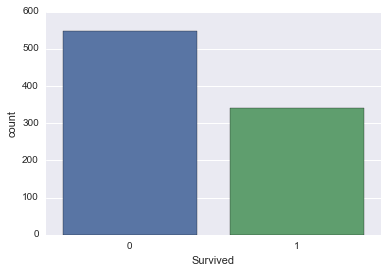

In [37]:
sns.countplot(x="Survived",data=df)

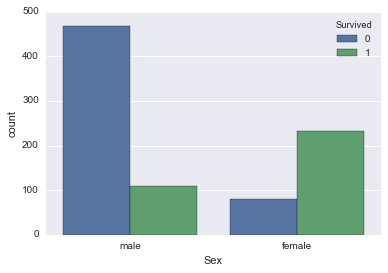

In [38]:
sns.countplot(x="Sex",hue="Survived",data=df)

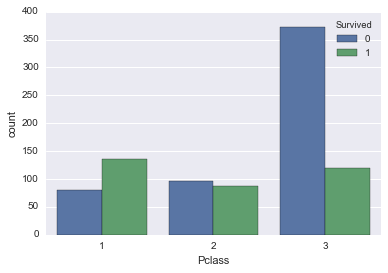

In [39]:
sns.countplot(x="Pclass",hue="Survived",data=df)

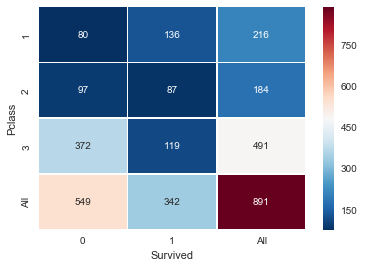

In [40]:
sns.heatmap(pd.crosstab(df['Pclass'],df['Survived'],margins=True),annot=True,linewidths=.5,fmt="d",cmap="RdBu_r")

In [41]:
print(df[df['Age']==min(df['Age'])]["Name"])
print('\n')
print(df[df['Age']==max(df['Age'])]["Name"])
print('\n')
print(np.mean(df['Age']))

803    Thomas, Master. Assad Alexander
Name: Name, dtype: object


630    Barkworth, Mr. Algernon Henry Wilson
Name: Name, dtype: object


29.6991176471


In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
df['last_name']=[str.split(x,",")[0] for x in df['Name']]

In [44]:
df['temp']=[str.split(x,",")[1] for x in df['Name']] #temp colun.. will delete it tlater

In [45]:
df['title']=[str.split(x,".")[0] for x in df['temp']]
df['title']=[df['title'][i].replace(" ","") for i in range(len(df))]

In [46]:
df['first_name']=[str.split(x,".")[1] for x in df['temp']]
del df['temp']

In [47]:
df[['title','first_name','last_name']].head()#answer

,title,first_name,last_name
0,Mr,Owen Harris,Braund
1,Mrs,John Bradley (Florence Briggs Thayer),Cumings
2,Miss,Laina,Heikkinen
3,Mrs,Jacques Heath (Lily May Peel),Futrelle
4,Mr,William Henry,Allen


In [48]:
df['title'].value_counts()

Mr             517
Miss           182
Mrs            125
Master          40
Dr               7
Rev              6
Major            2
Col              2
Mlle             2
Capt             1
Mme              1
theCountess      1
Don              1
Lady             1
Ms               1
Jonkheer         1
Sir              1
Name: title, dtype: int64

In [49]:
# except the first 4 all shd be grouped into others
df['title']=["Others" if df['title'][i] in (['Dr','Rev','Major','Col','Mlle','Jonkheer','Ms','Sir','Don','Mme','Capt','Lady','theCountess']) else df['title'][i] for i in range(len(df))]
df.groupby(['title'])['Age'].mean()

title
Master     4.574167
Miss      21.773973
Mr        32.368090
Mrs       35.898148
Others    42.384615
Name: Age, dtype: float64

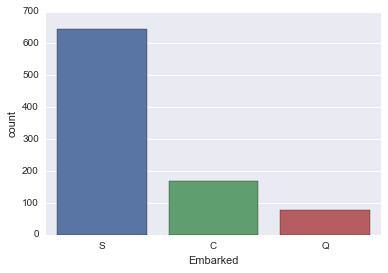

In [50]:
sns.countplot(x="Embarked",data=df)

In [51]:
df[((df['Age']).isnull()) & (df['title']=="Master")]['Age']=np.mean(df['Age'][df['title']=="Master"])
#its  awarning.. i wil gnore it..

In [52]:
df[((df['Age']).isnull()) & (df['title']=="Miss")]['Age']=np.mean(df['Age'][df['title']=="Miss"])

In [53]:
df[((df['Age']).isnull()) & (df['title']=="Mr")]['Age']=np.mean(df['Age'][df['title']=="Mr"])
df[((df['Age']).isnull()) & (df['title']=="Mrs")]['Age']=np.mean(df['Age'][df['title']=="Mrs"])

In [54]:
df[((df['Age']).isnull()) & (df['title']=="Others")]['Age']=np.mean(df['Age'][df['title']=="Others"])

In [29]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
df[df['Embarked'].isnull()]['Embarked']='S'

In [55]:
df.to_csv("titanic_imputed.csv",index=False)